In [1]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


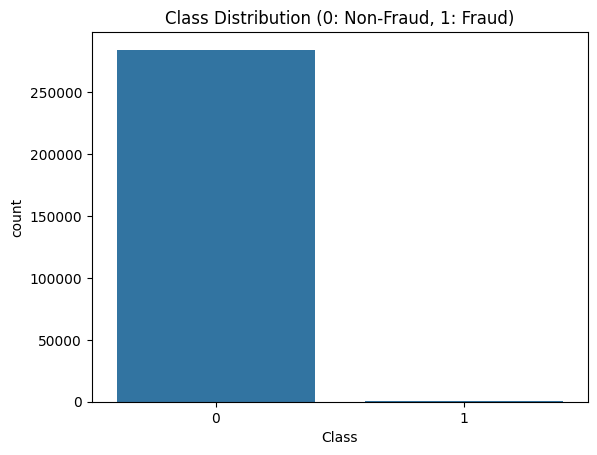

In [ ]:
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()


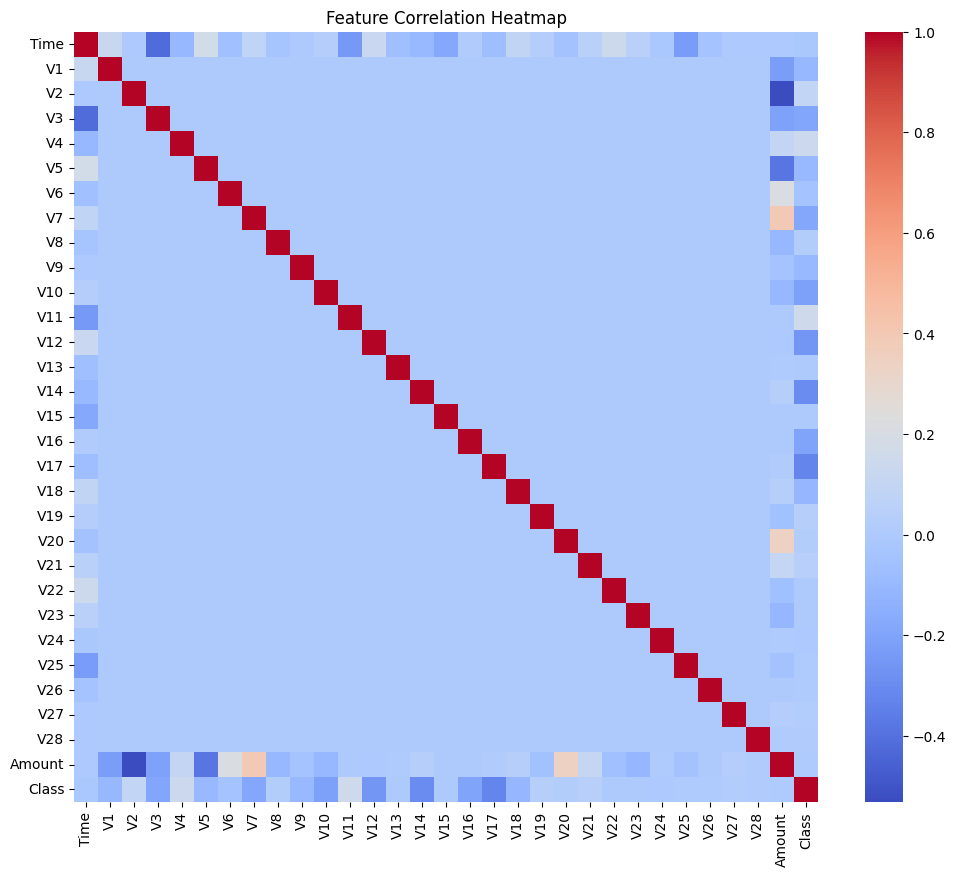

In [4]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [39]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis=1)
y = df['Class']

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.70)
X_pca = pca.fit_transform(X)

smote = SMOTE(random_state=42 , sampling_strategy=0.2)
X_pca , y = smote.fit_resample(X_pca , y)



In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.value_counts())


(238824, 20)
Class
0    198951
1     39873
Name: count, dtype: int64


In [56]:
rf = RandomForestClassifier(n_estimators=100, n_jobs = -1 , random_state=42 , max_depth=15 , max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

In [57]:
y_pred = rf.predict(X_test)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(y_test.value_counts())

Confusion Matrix:
[[85333    31]
 [  479 16511]]
Class
0    85364
1    16990
Name: count, dtype: int64


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85364
           1       1.00      0.97      0.98     16990

    accuracy                           1.00    102354
   macro avg       1.00      0.99      0.99    102354
weighted avg       1.00      1.00      0.99    102354



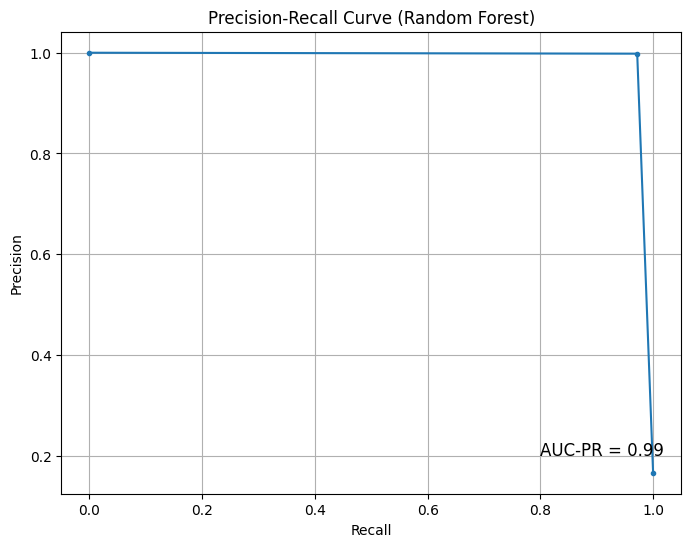

In [59]:
from sklearn.metrics import classification_report, precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

auc_pr = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.text(0.8, 0.2, f'AUC-PR = {auc_pr:.2f}', fontsize=12)
plt.grid(True)
plt.show()

In [60]:
print("Accuracy Training:", rf.score(X_test, y_test))


Accuracy Training: 0.995017292924556
